# **What is Data Ingestion?**
Data ingestion is the process of loading external documents and storing them in a vector database for retrieval. These documents can be in various formats, such as PDF, DOC, TXT, HTML, and more. The ingestion process includes the following steps:

1.   **Load** - Loading the data into documents
2.   **Split** — Splitting the data into smaller, manageable chunks
3.   **Embed** — Creating document embeddings
4.  **Store** — Storing the embeddings in a vector database

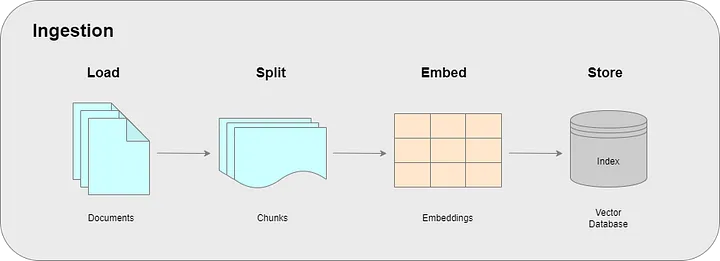

## **1. Data Loading**
Data loading involves extracting data from a source and converting it into a suitable format for use in a RAG application.

**Loaders**
LangChain offers a comprehensive set of loaders that facilitate data ingestion and preprocessing from various sources, converting it into documents for further processing. Data is loaded into a Document object, which consists of the text content and its associated metadata.

Loaders can handle multiple sources, including text files, PDFs, word documents, web pages, and more.
They also perform essential preprocessing tasks such as tokenization, normalization, and format conversion, ensuring the data is ready for LLMs.
Loaders are customizable to manage specific data formats and seamlessly integrate with other LangChain components.

**Examples:** Data Loading using LangChain
Load a PDF document (.pdf)

In [1]:
from langchain_community.document_loaders import PyPDFLoader
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

file_path = "data/document_to_ingest.pdf"  # Path of the document to be loaded
loader = PyPDFLoader(file_path)     # Initialize the pdf loader
documents = loader.load()           # Load the pdf document

print(f"PDF content ${documents}")

# documents will be used later for further processing

PDF content $[Document(metadata={'producer': 'QuarkXPress(R) 9.5', 'creator': 'QuarkXPress(R) 9.5', 'creationdate': '2013-12-18T10:01:51-05:00', 'moddate': '2014-02-19T15:40:55-06:00', 'title': 'Layout 1', 'xpressprivate': '%%DocumentProcessColors: Cyan Magenta Yellow Black\n%%EndComments', 'source': 'data/document_to_ingest.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='D ALE  C AR N E G IE ’S \nG O LD E N  B O O K \nw w w.dalecarnegie.com'), Document(metadata={'producer': 'QuarkXPress(R) 9.5', 'creator': 'QuarkXPress(R) 9.5', 'creationdate': '2013-12-18T10:01:51-05:00', 'moddate': '2014-02-19T15:40:55-06:00', 'title': 'Layout 1', 'xpressprivate': '%%DocumentProcessColors: Cyan Magenta Yellow Black\n%%EndComments', 'source': 'data/document_to_ingest.pdf', 'total_pages': 7, 'page': 1, 'page_label': '2'}, page_content='G O LD E N  B O O K \nPrinciples from  H ow  to W in Friends and Influence People \nBecom e a Friendlier Person \n1 . Don’t criticize, condem n or c

In [2]:
print(len(documents))                                       # Print the length of documents
print(documents[0].__getattribute__('metadata'))            # Print the metadata of the first document
print(documents[0].__getattribute__('page_content')[:100])  # Print the first 100 characters of the first document content

7
{'producer': 'QuarkXPress(R) 9.5', 'creator': 'QuarkXPress(R) 9.5', 'creationdate': '2013-12-18T10:01:51-05:00', 'moddate': '2014-02-19T15:40:55-06:00', 'title': 'Layout 1', 'xpressprivate': '%%DocumentProcessColors: Cyan Magenta Yellow Black\n%%EndComments', 'source': 'data/document_to_ingest.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}
D ALE  C AR N E G IE ’S 
G O LD E N  B O O K 
w w w.dalecarnegie.com


**Load a WEB page (.html)**

In [3]:
from langchain_community.document_loaders import WebBaseLoader

web_path = "https://python.langchain.com/v0.2/docs/introduction/"   # Path of the web page to be loaded
loader = WebBaseLoader(web_path)       # Initialize the web page loader
web_data = loader.load()        

print(f"Web content ${web_data}")


USER_AGENT environment variable not set, consider setting it to identify your requests.


Web content $[Document(metadata={'source': 'https://python.langchain.com/v0.2/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}, page_content='\n\n\n\n\nIntroduction | 🦜️🔗 LangChain\n\n\n\n\n\n\n\nSkip to main contentA newer LangChain version is out! Check out the latest version.IntegrationsAPI referenceLatestLegacyMorePeopleContributingCookbooks3rd party tutorialsYouTubearXivv0.2Latestv0.2v0.1🦜️🔗LangSmithLangSmith DocsLangChain HubJS/TS Docs💬SearchIntroductionTutorialsBuild a Question Answering application over a Graph DatabaseTutorialsBuild a Simple LLM Application with LCELBuild a Query Analysis SystemBuild a ChatbotConversational RAGBuild an Extraction ChainBuild an AgentTaggingdata_generationBuild a Local RAG ApplicationBuild a PDF ingestion and Question/Answering systemBuild a Retrieval Augmented Generation (RAG) AppVector stores and retrie

In [4]:
print(len(web_data))                                       # Print the length of documents
print(web_data[0].__getattribute__('metadata'))            # Print the metadata of the first document
print(web_data[0].__getattribute__('page_content')[:100])  # Print the first 100 characters of the first document content

1
{'source': 'https://python.langchain.com/v0.2/docs/introduction/', 'title': 'Introduction | 🦜️🔗 LangChain', 'description': 'LangChain is a framework for developing applications powered by large language models (LLMs).', 'language': 'en'}





Introduction | 🦜️🔗 LangChain







Skip to main contentA newer LangChain version is out! Check


**The choice of loader depends on the nature of the data, as each loader has unique characteristics, and returns information differently. It’s essential to explore various loaders to understand their offerings and determine how to best utilize them when building AI products with RAG.**

**Metadata — Importance and Usage**

Metadata essentially refers to data about data. When loaders extract content, they also provide metadata such as the data source or page numbers, which can be highly useful. For instance, if you’re building an application where users need to retrieve information along with its source or page location, metadata offers all the necessary details, simplifying information verification. These features can significantly enhance your application, and the metadata can even be edited to introduce additional value-added features.

## **2. Data Splitting/Chunking**
When performing preprocessing for RAG, it’s crucial to consider the nature of the data, the type of RAG system being built, and its limitations. After loading documents, we’ll often need to transform them to fit our application’s requirements. For example, if we have a book with more than 1000 pages, we cannot pass the entire content to an LLM due to its limited context window. This is where chunking or splitting the data into smaller, manageable parts becomes essential.

There are three key reasons for splitting data:
- **Manageability**
- **Embedding model compatibility**
- **Efficient retrieval**

Chunking can be done at different levels — sentences, paragraphs, or chapters — depending on the problem and type of data.

**Data Splitting**
LangChain provides a variety of built-in document transformers that simplify tasks like splitting, combining, filtering, and manipulating documents. Splitters are tools used to divide large text documents into smaller, semantically meaningful chunks. These chunks can then be processed individually for various NLP tasks, ensuring they stay within the size constraints of the model.

**Types of Splitters**
- **Recursive Splitter**
- **HTML Splitter**
- **Markdown Splitter**
- **Code Splitter**
- **Token Splitter**
- **Character Splitter**
- **Semantic Chunker**

**RecursiveCharacterTextSplitter**

This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs (and then sentences, and then words) together as long as possible.

In [5]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Initialize the recursive character text splitter
text_splitter = RecursiveCharacterTextSplitter(              
    separators="",
    chunk_size=100,
    chunk_overlap=20,
    add_start_index=True
)   

# Split the documents into chunks
chunks = text_splitter.split_documents(documents)

 # chunks variable will be used later for embadding purpose   

**Semantic Chunker**

At a high level, this splits into sentences, then groups into groups of 3 sentences, and then merges ones that are similar in the embedding space (sematically similar).

In [6]:
from langchain_experimental.text_splitter import SemanticChunker
from langchain_huggingface import HuggingFaceEmbeddings

# Use a smaller, faster model for embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Initialize the semantic chunker
text_splitter = SemanticChunker(embeddings, breakpoint_threshold_type='percentile')

# Split the documents into chunks
chunks = []
for doc in documents:
    texts = text_splitter.split_text(doc.page_content)
    chunks.extend(texts)

for chunk in enumerate(chunks):
    print(chunk)

c:\Users\noepolak1\Desktop\gen-ai-trainings\gen-ai-workshop-notebooks\genai-venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(0, 'D ALE  C AR N E G IE ’S \nG O LD E N  B O O K \nw w w.dalecarnegie.com')
(1, 'G O LD E N  B O O K \nPrinciples from  H ow  to W in Friends and Influence People \nBecom e a Friendlier Person \n1 . Don’t criticize, condem n or com plain. 2 . G ive honest, sincere appreciation. 3. A rouse in the other person an eager w ant. 4 . B ecom e genuinely interested in other people. 5.')
(2, 'Sm ile.')
(3, '6. R em em ber that a person’s nam e is to that person the sw eetest \nand m ost im portant sound in any language. 7.')
(4, 'B e a good listener. Encourage others to talk about them selves. 8. Talk in term s of the other person’s interests. 9. M ake the other person feel im portant - and do it sincerely. – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – \nW in People to Your W ay of Thinking \n1 0. The only w ay to get the best of an argum ent is to avoid it. 1 1 . Show  respect for the other person’s opinion. N ever say, “You’re w rong.” \n1 2 . If you are w ro

## **3. Embeddings**
All artificial intelligence is fundamentally mathematics. Machines don’t understand text; they process numbers. To bridge this gap, we must convert textual data into numerical form, a process known as vector embeddings. These embeddings are stored in a vector store or vector database for efficient retrieval.

Embeddings are dense vector representations that capture the semantic meaning of words, phrases, or sentences. Words with similar meanings have closer numerical representations, while words with different meanings have more distinct vectors. Importantly, embeddings aren’t single numbers but multi-dimensional vectors, representing the nuanced relationships between words. LLMs learn these representations, making words with smaller mathematical differences more semantically related.

Embeddings are calculated using embedding models, which are typically built from the encoder part of a transformer model. While large language models (LLMs) are developed from the decoder part, the encoder is responsible for learning meaningful representations of data, and the decoder generates new content based on these learned representations.

In [7]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

# Initialize the Hugging Face embedding model
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")



In [8]:
# Create embeddings of text chunks
for i, chunk in enumerate(chunks):
    print("Text chunk ", i)
    print("--------------")
    print(chunk, "\n")
    query_result = embeddings.embed_query(chunk)
    print("Embeddings", "\n", query_result, "\n\n")

Text chunk  0
--------------
D ALE  C AR N E G IE ’S 
G O LD E N  B O O K 
w w w.dalecarnegie.com 

Embeddings 
 [-0.01348824705928564, 0.06525024771690369, 0.005760470870882273, 0.07850916683673859, -0.03257226198911667, 0.03250953555107117, 0.022963285446166992, 0.03713185340166092, -0.010817556641995907, 0.02617405354976654, 0.04302133247256279, 0.009236444719135761, 0.010588903911411762, 0.042570795863866806, 0.039190687239170074, -0.04036333039402962, -0.0407368503510952, -0.0030359679367393255, -0.026617806404829025, -0.028980225324630737, 0.015198451466858387, 0.013693129643797874, -0.022471075877547264, -0.0011476415675133467, -0.024670660495758057, -0.0053079393692314625, 0.037301138043403625, -6.064581157261273e-06, 0.03203088045120239, -0.06721121072769165, -0.012438157573342323, 0.058419618755578995, 0.00036027489113621414, 0.030325790867209435, 2.2293031634035287e-06, 0.02724572643637657, 0.016120262444019318, 0.023101694881916046, -0.021215876564383507, 0.0482957288622856

# **4. Data Storage — Vector Stores**
A vector is a mathematical representation used to store data in a computer, a concept known as representation learning. To store these representations efficiently, vector stores are employed. They are highly optimized databases designed for storing and querying high-dimensional vector data, making them essential in AI, especially in applications like recommendation systems and retrieval-augmented generation (RAG).

Vector embeddings are stored in specialized databases known as vector stores, which differ significantly from traditional or relational databases. In traditional databases, data is organized in rows and columns, similar to an Excel sheet. However, storing unstructured data like images, speech, or text in this format is inefficient, making vector stores a better choice.

Let’s explore the difference with an example. Exact search (e.g., looking for a specific product by its exact ID or name in an online store) is handled by traditional relational databases (RDBMS). Suggestions or recommendations (e.g., finding products with similar features, style, or price range when you don’t know the exact item) rely on vector stores, which compare items based on their vector embeddings to provide relevant recommendations. Therefore, conventional databases retrieve exact matches, while vector stores focus on similarity-based retrieval.

Vector stores are primarily used in machine learning and data retrieval applications where the goal is to find semantically similar information. Following are some of their use cases:

-   Retrieval in RAG-based systems.
-   Recommendation systems through similarity search.
-   Anomaly detection by identifying unusual or unknown queries.
-   Vector search for NLP applications like document retrieval.
-   Image and video retrieval.

**Structure of a Vector Store:**

**Vectors/Embeddings:** These are mathematical representations of images, audio, or text and form the core component.

**Metadata:** Additional information about the vector such as: time, date, and location for images or author, publication year, and topic for books.

**Original data:** While not always necessary, in RAG applications it can be useful to store the original text or data in the vector store.

**Unique ID:** Each row in the vector store is identified by a unique ID generated by the system.

Popular Vector Stores:
-   Pinecone
-   FAISS (Facebook AI Similarity Search)
-   Qdrant
-   Chroma

In [9]:
from langchain_community.vectorstores import FAISS


# embeddings variable has been created in last step code execution
# Store embeddings into the vector store
chunks = text_splitter.split_documents(documents)
# Store embeddings into the vector store
vector_store = FAISS.from_documents(
    documents=chunks,
    embedding=embeddings
)

In [10]:
for i, (doc_id, doc) in enumerate(vector_store.docstore._dict.items()):
    print(f"Document {i}: {doc.page_content}")
    if i >= 2:  # limit to first 3 documents
        break

Document 0: D ALE  C AR N E G IE ’S 
G O LD E N  B O O K 
w w w.dalecarnegie.com
Document 1: G O LD E N  B O O K 
Principles from  H ow  to W in Friends and Influence People 
Becom e a Friendlier Person 
1 . Don’t criticize, condem n or com plain. 2 . G ive honest, sincere appreciation. 3. A rouse in the other person an eager w ant. 4 . B ecom e genuinely interested in other people. 5.
Document 2: Sm ile.


***Run a simple similarity search***

In [11]:
results = vector_store.similarity_search("criticize, condemn or complain.", k=3)

for i, res in enumerate(results):
    print(f"Result {i+1}:")
    print(res.page_content)
    print("—" * 40)

Result 1:
G O LD E N  B O O K 
Principles from  H ow  to Stop W orrying and Start Living 
The Perfect W ay to Conquer W orry 
1 . Pray. – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – – 
Don't W orry about Criticism 
1 . R em em ber that unjust criticism  is often a disguised com plim ent. 2 .
————————————————————————————————————————
Result 2:
Let the other person save face. 2 7. Praise the slightest im provem ent and praise every im provem ent. B e “hearty in your approbation and lavish in your praise.” 
2 8. G ive the other person a fine reputation to live up to. 2 9. U se encouragem ent. M ake the fault seem  easy to correct. 30. M ake the other person happy about doing the thing you suggest.
————————————————————————————————————————
Result 3:
2 . W eigh all the facts —  then com e to a decision. 3. O nce a decision is reached, act! 4 . W rite out and answ er the follow ing questions: 
a. W hat is the problem ? b. W hat are the causes of the problem ? c. W

**Check embedding dimensions**

In [12]:
print(f"Embedding dimension: {vector_store}")

Embedding dimension: <langchain_community.vectorstores.faiss.FAISS object at 0x000001D46771CD90>
